# Proyecto


##Generacion del agente

In [ ]:
import numpy as np
import pprint as p
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


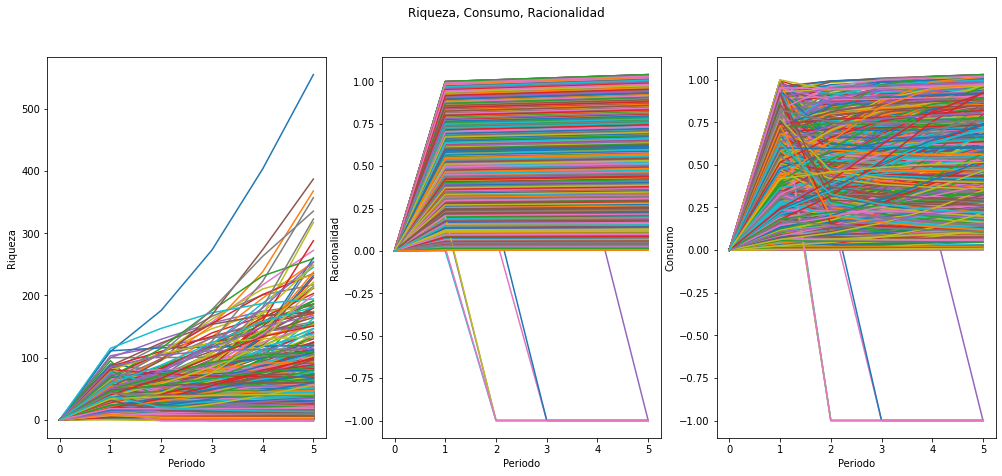

In [ ]:
# Plot the firms' trajectories of the proportional growth model

#input
p = 0.1
n = 3
s = 0
at = 0.01

population_size = 1000
periods = 6

#Listas
his_wealths = np.zeros((population_size, periods))
his_racionalidad = np.zeros((population_size, periods))
his_id = np.zeros((population_size, periods))
his_consumo = np.zeros((population_size, periods))
his_suerte = np.zeros((population_size, periods))

#Tiempo 1
his_wealths[:, 1] = np.random.negative_binomial(n,p,size=population_size)
his_racionalidad[:, 1] = np.random.rand(population_size)
his_id[:, 1] = range(population_size)
his_consumo[:, 1] = np.random.rand(population_size)
his_suerte[:, 1] = np.random.rand(population_size)

#Tiempo  n
for i in range(2,periods):
  #Suerte
  his_suerte[:, i] = np.random.rand(population_size)

  #Ganancia
  his_wealths[:, i] = his_wealths[:, i-1]*(1+his_racionalidad[:, i-1] - his_consumo[:, i-1])

  #Adaptabilidad
  his_racionalidad[:, i] = his_racionalidad[:, i-1]*(1+at) #R_t
  his_racionalidad[:, i][his_suerte[:, i]<s] = his_racionalidad[:, i-1][his_suerte[:, i]<s] * (1+at+ his_consumo[:, i-1][his_suerte[:, i]<s]) #R_Sc
  his_consumo[:, i] = his_consumo[:, i-1]*(1+ ((his_wealths[:,i]/his_wealths[:,i-1])-1) ) #C_W

  #Muerte
  his_wealths[:, i][his_wealths[:, i]<1] = -1
  his_consumo[:, i][his_wealths[:, i]<1] = -1
  his_racionalidad[:, i][his_wealths[:, i]<1] = -1

fig, (plt1, plt2, plt3) = plt.subplots(nrows=1, ncols=3)
fig.suptitle('Riqueza, Consumo, Racionalidad')
for history in his_wealths:
  plt1.plot(history)
plt1.set_xlabel('Periodo')
plt1.set_ylabel('Riqueza')

for history in his_racionalidad:
  plt2.plot(history)
plt2.set_xlabel('Periodo')
plt2.set_ylabel('Racionalidad')

for history in his_consumo:
  plt3.plot(history)
plt3.set_xlabel('Periodo')
plt3.set_ylabel('Consumo')
fig.set_size_inches(17, 7)
fig.savefig('grafics_t.pdf')




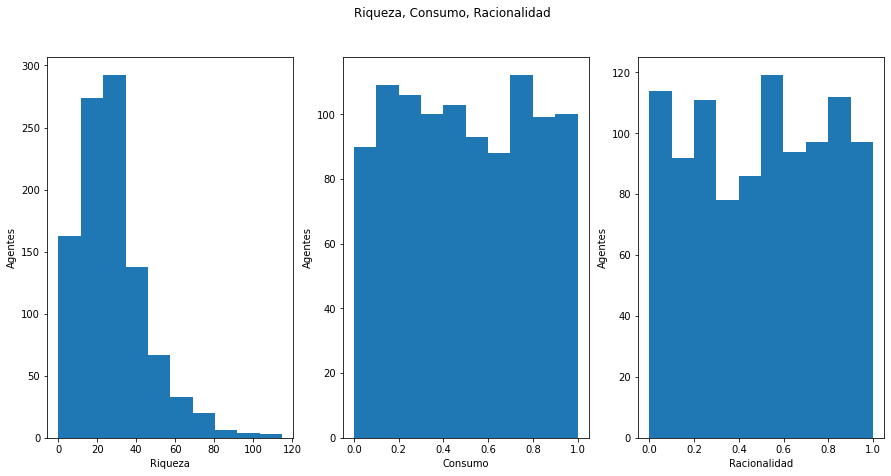

In [ ]:
def modelo(t):
  fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,)
  fig.suptitle('Riqueza, Consumo, Racionalidad')
  ax1.hist(his_wealths[:,t])
  ax1.set_ylabel('Agentes')
  ax1.set_xlabel('Riqueza')

  ax2.hist(his_consumo[:,t])
  ax2.set_ylabel('Agentes')
  ax2.set_xlabel('Consumo')

  ax3.hist(his_racionalidad[:,t])
  ax3.set_ylabel('Agentes')
  ax3.set_xlabel('Racionalidad')
  fig.set_size_inches(15, 7)
  fig.savefig('grafics_i.pdf')
  return(plt.show())

modelo(1)

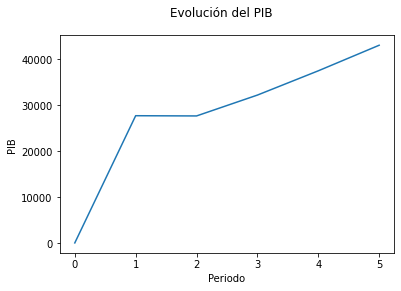

In [ ]:
PIB = []
Muertes = []
prom_PIB=[]
desv_PIB=[]
prom_rac=[]
desv_rac=[]

#promedio y desviación estándar de riqueza por periodo en una tablita
for i in range(periods):
  PIB.append(sum(his_wealths[:,i]))
  Muertes.append(sum(his_wealths[:,i][his_wealths[:,i]== -1]))
  prom_PIB.append(np.mean(his_wealths[:,i]))
  desv_PIB.append(np.std(his_wealths[:,i]))
  prom_
  .append(np.mean(his_racionalidad[:,i]))
  desv_rac.append(np.std(his_racionalidad[:,i]))

plt.plot(PIB)
plt.suptitle('Evolución del PIB')
plt.ylabel('PIB')
plt.xlabel('Periodo')
plt.savefig('grafics_PIB.pdf')
plt.show()


In [ ]:
prom_PIB = np.array(prom_PIB)
desv_PIB = np.array(desv_PIB)
prom_rac = np.array(prom_rac)
desv_rac = np.array(desv_rac)

In [ ]:
pd.DataFrame(prom_PIB,prom_rac)

,0
0.000000,0.000000
0.499235,27.709000
0.499812,27.659373
0.502577,32.204741
0.507663,37.489630
0.511619,43.059998


In [ ]:
pd.DataFrame(desv_PIB,desv_rac)

,0
0.000000,0.000000
0.292002,17.432163
0.308762,21.853134
0.318393,30.184096
0.321295,41.407799
0.327567,55.633678


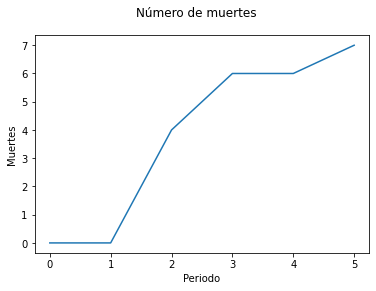

In [ ]:
Muertes = np.array(Muertes)

plt.plot(abs(Muertes))
plt.suptitle('Número de muertes')
plt.ylabel('Muertes')
plt.xlabel('Periodo')
plt.savefig('grafics_Muertes.pdf')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


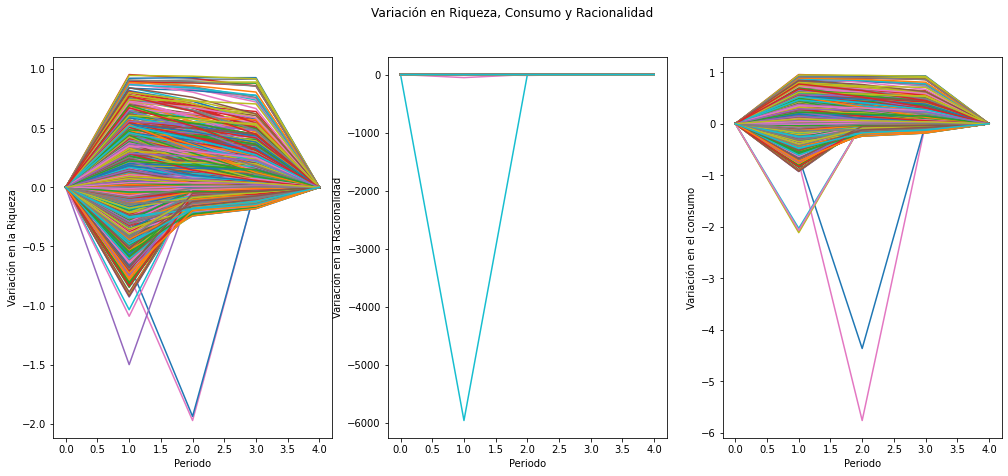

In [ ]:
#Variaciones
var_his_wealths = np.zeros((population_size, periods-1))
var_his_racionalidad = np.zeros((population_size, periods-1))
var_his_consumo = np.zeros((population_size, periods-1))

for i in range(2,periods-1):
  var_his_wealths[:,i-1]= (his_wealths[:,i]-his_wealths[:,i-1])/his_wealths[:,i-1]
  var_his_racionalidad[:,i-1]= (his_racionalidad[:,i]-his_racionalidad[:,i-1])/his_racionalidad[:,i-1]
  var_his_consumo[:,i-1]=  (his_consumo[:,i]-his_consumo[:,i-1])/his_consumo[:,i-1]


fig, (plt1, plt2, plt3) = plt.subplots(nrows=1, ncols=3)
fig.suptitle('Variación en Riqueza, Consumo y Racionalidad')
for history in var_his_wealths:
  plt1.plot(history)
plt1.set_xlabel('Periodo')
plt1.set_ylabel('Variación en la Riqueza')

for history in var_his_racionalidad:
  plt2.plot(history)
plt2.set_xlabel('Periodo')
plt2.set_ylabel('Variación en la Racionalidad')

for history in var_his_consumo:
  plt3.plot(history)
plt3.set_xlabel('Periodo')
plt3.set_ylabel('Variación en el consumo')

fig.set_size_inches(17, 7)
fig.savefig('grafics_tv.pdf')
